In [2]:
from keras.datasets import fashion_mnist
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing import image
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [233]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [312]:
print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

print(train_Y[1])
print(len(train_X))

Training data shape :  (48000, 28, 28, 1) (60000,)
Testing data shape :  (10000, 28, 28, 1) (10000,)
0
48000


In [235]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5,1,'Ground Truth : 9')

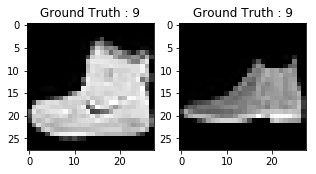

In [236]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [237]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [238]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [239]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[256])
print('After conversion to one-hot:', train_Y_one_hot[256])

Original label: 6
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [240]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [241]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [242]:
batch_size = 64
epochs = 20
num_classes = 10

In [243]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [244]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [245]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 128)         73856     
__________

In [246]:

fashion_train = fashion_model.fit(train_X, train_label, 
                                  batch_size=batch_size,
                                  epochs=epochs,
                                  verbose=1,
                                  validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 53s 1ms/step - loss: 0.4596 - acc: 0.8335 - val_loss: 0.3489 - val_acc: 0.8702
Epoch 2/20
48000/48000 [==============================] - 53s 1ms/step - loss: 0.2899 - acc: 0.8934 - val_loss: 0.2977 - val_acc: 0.8883
Epoch 3/20
48000/48000 [==============================] - 52s 1ms/step - loss: 0.2443 - acc: 0.9109 - val_loss: 0.2530 - val_acc: 0.9078
Epoch 4/20
48000/48000 [==============================] - 53s 1ms/step - loss: 0.2123 - acc: 0.9217 - val_loss: 0.2333 - val_acc: 0.9139
Epoch 5/20
48000/48000 [==============================] - 51s 1ms/step - loss: 0.1849 - acc: 0.9320 - val_loss: 0.2333 - val_acc: 0.9128
Epoch 6/20
48000/48000 [==============================] - 53s 1ms/step - loss: 0.1610 - acc: 0.9406 - val_loss: 0.2315 - val_acc: 0.9174
Epoch 7/20
48000/48000 [==============================] - 56s 1ms/step - loss: 0.1399 - acc: 0.9478 - val_loss: 0.2443 - val_acc

In [249]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [250]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.4757522279702127
Test accuracy: 0.9138


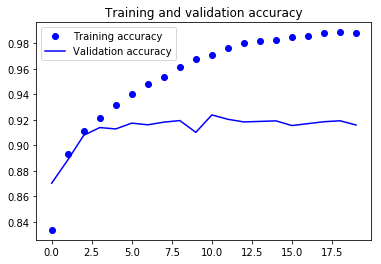

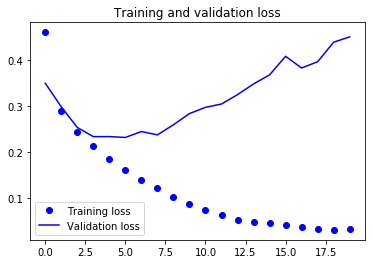

In [251]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

(2, 28, 28, 1)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


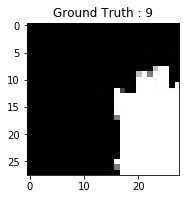

<Figure size 360x360 with 0 Axes>

In [305]:
# print(test_X[0][0][0])
# im = cv2.imread("test.png",0)

img = image.load_img(path="3.jpg",grayscale=True,target_size=(28,28,1)) 
im = image.load_img(path="4.jpg",grayscale=True,target_size=(28,28,1))
# Display the first image in training data
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))
im = image.img_to_array(im)
img = image.img_to_array(img)

plt.figure(figsize=[5,5])



# im = im.reshape(28,28)
# print(im)
npa = np.array([img,im])
print(npa.shape)
# predicted_classes = fashion_model.predict(test_X)
predicted_classes = fashion_model.predict(npa)
print(predicted_classes)
#print(type(test_X))
#print(len(test_X[0]))

In [284]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

((1,), (10000,))

Found 1000 correct labels


IndexError: index 18 is out of bounds for axis 0 with size 1

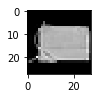

In [285]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

In [5]:
import cv2
import time

#time.sleep(5)
cap = cv2.VideoCapture(0)
i = 1
while(i < 1000):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #ret,th1 = cv2.threshold(gray,80,255,cv2.THRESH_BINARY)
    #cv2.imwrite("one/one" + str(i) + '.png',gray)
    # Display the resulting frame
    cv2.putText(gray,'OpenCV Tuts!',(0,130), 20, 1, (200,255,155), 2, cv2.LINE_AA)
    cv2.imshow('frame',gray)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    #print("hello")
    i += 1
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

Text(0.5,1,'Ground Truth : 9')

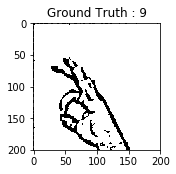

In [155]:
im = cv2.imread("test.png")
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))
